<a href="https://colab.research.google.com/github/9characters/ML-projects/blob/main/Adversarial_attack_on_Images_deriving_inaccurate_ML_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Adversarial manipulation of AI/ML Algorithms
###  Using multi Pixel Attack to recreate Adversarial example using MobileNet CNN model pretrained on ImageNet.

### Learning Objectives
* Learn to load and preprocess images for model prediction.  
* Learn how to change a pixel in the image by adding color noise to it. 
* Learn to import and use a pre-trained model from Keras and make predictions on the model.

### Imports
Import all the required libraries including tensorflow, numpy, keras and matplotlib.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.applications.mobilenet import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

### Download the image from the source
Use the function download_from_url to download the source image so that it can be used as an input in MobileNet.

In [ ]:
import requests

def download_from_url(url, dst):
    r = requests.get(url, stream=True)
    with open(dst, 'wb') as f:
        for data in r.iter_content():
            f.write(data)

### Image URL from ImageNet
The variable url and filename consist of ImageNet image and the respective filename. Let's use a sample image of a bison from ImageNet and preprocess the image inorder to be able to use in MobileNet model.

In [ ]:
url = 'http://users.telenet.be/be.bartlog/media/ardennes_bison3.jpg'
filename = 'bison.jpg'

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/9/91/Wall_clock.png"
filename = "wall_clock.png"

### Download the image from ImageNet
Use the given image url and filename to download the image.

In [ ]:
download_from_url(url, filename)

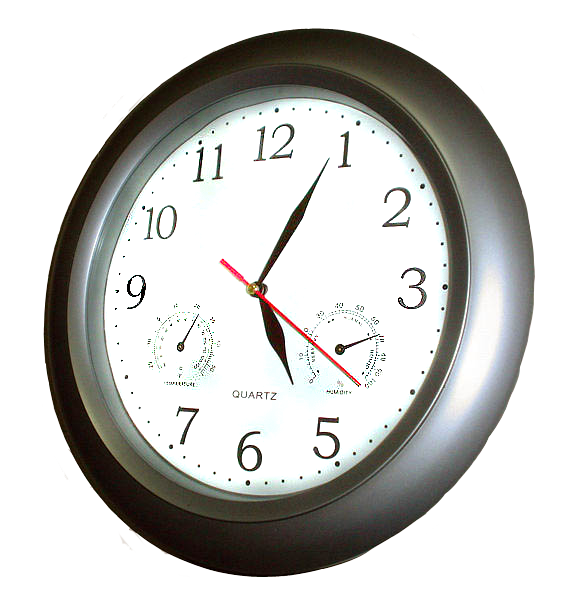

In [ ]:
from IPython.display import Image
Image(filename='wall_clock.png', width=300,height=200)

### Load Image
Load and convert the image to numpy array for preprocessing.

In [ ]:
def prepare_image(file):
    x, y = 224, 224 #height, width
    img = load_img(file, target_size=(x,y)) #returns PIL image
    img_array = img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return img_array_expanded_dims

In [ ]:
image = prepare_image(filename) #Prepare the image for the model

### Plot Image
Use the function plot_image to plot the given image.

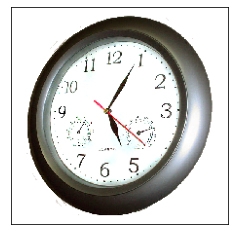

In [ ]:
def plot_image(image, label_true=None, class_names=None, label_pred=None):
    image = image[0]
    plt.imshow(image.astype(np.uint8))

    plt.xticks([])  # Remove ticks from the plot
    plt.yticks([])

plot_image(image)

### Load pretrained Model
Import MobileNet from Keras which returns Keras Image classification model which is pretrained using Imagenet. 

In [ ]:
pretrained_model = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


### Preprocess the image input
Use the function preprocess_input to preprocess the image so that it can be used as an input in MobileNet. Use the pretrained_model for prediction and test the given image in the model.

In [ ]:
preprocessed_image = preprocess_input(image.copy()) #preprocess using the preprocess_input library
predictions = pretrained_model.predict(preprocessed_image) #Get the predicted probabilities for each class
label = decode_predictions(predictions, top=13) #Convert the probabilities to class labels 
label

[[('n04548280', 'wall_clock', 0.80452675),
  ('n02708093', 'analog_clock', 0.19386357),
  ('n02794156', 'barometer', 0.00081224105),
  ('n04328186', 'stopwatch', 0.00077965244),
  ('n03841143', 'odometer', 1.2436149e-05),
  ('n03196217', 'digital_clock', 2.5642526e-06),
  ('n03197337', 'digital_watch', 1.0881062e-06),
  ('n04317175', 'stethoscope', 1.0339503e-06),
  ('n03706229', 'magnetic_compass', 4.3963044e-07),
  ('n03400231', 'frying_pan', 6.667893e-08),
  ('n03692522', 'loupe', 2.9092332e-08),
  ('n04141975', 'scale', 2.4182556e-08),
  ('n03314780', 'face_powder', 1.9052269e-08)]]

### Distort pixel in an image
Use the function perturb_image to add noise to the pixel in the image to see how accurately the trained model predicts on the perturbed image. 

In [ ]:
def perturb_image(xs, img):
    x_pos, y_pos, *rgb = xs
    img[0][x_pos, y_pos] = rgb
    return img

## SECTION I 
### One Pixel Attack

### Create One Pixel Perturbed Image
Use the numpy array to perturb the images by one pixel and plot the image.

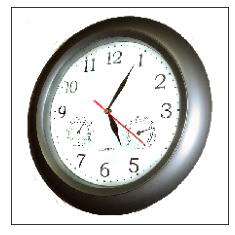

In [ ]:
pixel = np.array([16, 16, 255, 255, 0]) # pixel = x,y,r,g,b
image_perturbed = perturb_image(pixel, image)
plot_image(image_perturbed)

### Make predictions on perturbed image
Preprocess the perturbed image and make prediction using the pretrained MobileNet model on the perturbed image.

In [ ]:
preprocessed_perturbed = preprocess_input(image_perturbed.copy())
predictions = pretrained_model.predict(preprocessed_perturbed)
label = decode_predictions(predictions, top=13)
label

[[('n04548280', 'wall_clock', 0.8412127),
  ('n02708093', 'analog_clock', 0.15750724),
  ('n02794156', 'barometer', 0.0007302232),
  ('n04328186', 'stopwatch', 0.00053326634),
  ('n03841143', 'odometer', 1.2180133e-05),
  ('n03196217', 'digital_clock', 2.2509073e-06),
  ('n03197337', 'digital_watch', 8.6114164e-07),
  ('n04317175', 'stethoscope', 7.2436666e-07),
  ('n03706229', 'magnetic_compass', 4.0259482e-07),
  ('n03400231', 'frying_pan', 4.7950433e-08),
  ('n04141975', 'scale', 2.6197409e-08),
  ('n03692522', 'loupe', 2.2439735e-08),
  ('n03314780', 'face_powder', 1.7153045e-08)]]

## SECTION II
### Multi pixels Attack

### Create Quarter Pixel Perturbed Image
Use the for loop to perturb the images by quarter of the pixels and plot the image.

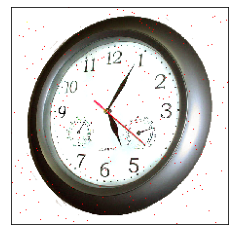

In [ ]:
import random 
image_perturbed = image.copy()

count = 0 
x = y = 224
ipos = set()
jpos = set()
i = random.randrange(0, x)
j = random.randrange(0, y)

while count < x//1.2:
  pixel = np.array([i, j, 255, 0, 0])
  image_perturbed = perturb_image(pixel, image_perturbed)
  ipos.add(i)
  jpos.add(j)
  while i in ipos:
    i = random.randrange(0, x)
  while j in jpos:
    j = random.randrange(0, y)
  count += 1

plot_image(image_perturbed)

### Make predictions on Quarter pixel perturbed image
Preprocess the perturbed image and make prediction using the pretrained MobileNet model on the perturbed image.

In [ ]:
preprocessed_perturbed = preprocess_input(image_perturbed.copy())
predictions = pretrained_model.predict(preprocessed_perturbed)
label = decode_predictions(predictions, top=13)
label

[[('n04548280', 'wall_clock', 0.9944534),
  ('n02708093', 'analog_clock', 0.0029427034),
  ('n02794156', 'barometer', 0.0016651108),
  ('n04328186', 'stopwatch', 0.000878304),
  ('n03841143', 'odometer', 4.7784608e-05),
  ('n03197337', 'digital_watch', 4.461729e-06),
  ('n03706229', 'magnetic_compass', 2.3897521e-06),
  ('n03196217', 'digital_clock', 2.2062088e-06),
  ('n04141975', 'scale', 1.3764625e-06),
  ('n04355338', 'sundial', 4.8626055e-07),
  ('n03692522', 'loupe', 1.8507342e-07),
  ('n04317175', 'stethoscope', 1.6588056e-07),
  ('n04476259', 'tray', 1.5133486e-07)]]

## SECTION III
### All Pixels Attack

### Create Fully Pixel Perturbed Image
Use the for loop to perturb the images by all the pixels and plot the image.

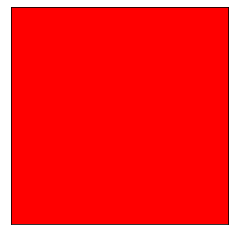

In [ ]:
image_perturbed = image.copy()
for i in range(0, 224):
  for j in range(0, 224):
    pixel = np.array([i, j, 255, 0, 0]) # pixel = x,y,r,g,b
    image_perturbed = perturb_image(pixel, image_perturbed)
plot_image(image_perturbed)

### Make predictions on all pixel perturbed image
Preprocess the perturbed image and make prediction using the pretrained MobileNet model on the perturbed image.

In [ ]:
preprocessed_perturbed = preprocess_input(image_perturbed.copy())
predictions = pretrained_model.predict(preprocessed_perturbed)
label = decode_predictions(predictions, top=13)
label

[[('n04525038', 'velvet', 0.15319413),
  ('n03291819', 'envelope', 0.07183739),
  ('n04372370', 'switch', 0.058519185),
  ('n02840245', 'binder', 0.05322415),
  ('n04265275', 'space_heater', 0.050886102),
  ('n03942813', 'ping-pong_ball', 0.019775169),
  ('n04209239', 'shower_curtain', 0.017551327),
  ('n04070727', 'refrigerator', 0.015396387),
  ('n03637318', 'lampshade', 0.015141311),
  ('n04201297', 'shoji', 0.015001955),
  ('n07747607', 'orange', 0.0148688285),
  ('n03832673', 'notebook', 0.014329376),
  ('n03530642', 'honeycomb', 0.014199874)]]

.

.

.

.

.

.

.

.

.

**Compare the classification results for different kind of pixel attacks demonstrated in the lab. [5 points]**

In actual result, the confidence score of "Bison" is 0.99063057.

In one pixel attack, a single pixel is perturbed. But the MobileNet model is pretty complex to capture the subtle features in the image. So the prediction of "Bison" is not altered at all, which was 0.9906634.

In multiple pixel attack, some multiple random pixels are altered. The image does not seem look perturbed, but there was little change in performance, in which the confidence score for "Bison" was 0.98911077.

In third case, when all the pixels are altered, the model completely loses the information of "Bison", rather predicts the image to be different other categories.

**Use Image(not from ImageNet) for the experiment and compare the results. [5 points]**

In this case, I used the image of a wall-clock. There are different results in different scenario.

1. *Using Original Image*: The confidence score of wall-clock is found to be 0.80452675. This is a pretty good performance for the image.
2. *One Pixel Attack*: I changed the single pixel of the image into RED (255,0,0), surprisingly the confidence score increased to 0.8412127. It might be that the extracted features from the perturbed image probably matched to the features of "Wall-Clock", which further increased the confidence score.
3. *Multiple Pixel Attack*: I changed the multiple pixels to red. More surprisingly, the confidence score bumped up to 0.9944534. This might be that the perturbed details that we added may work in favor of the features of "wall-clock" which more readily predicted the image to be wall-clock.
4. *Changing all the pixels*: This was pretty straight-forward, as changing all the pixels totally removed the feature of wall-clock in the image, therefore the predictions came out to be some low scores of different classes.

Conclusion: This shows that, if the data is perturbed then the model may have good confidence score, so the model is more confident with the unwanted features are well. This shows that the ML model can be under any type of such adversarial attacks.